In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

         
    “”“
    
    随机森林
    
    ”“”
    

In [3]:
#make_moon数据集
X,y = make_moons(n_samples=100,noise=0.5,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [19]:
import mglearn

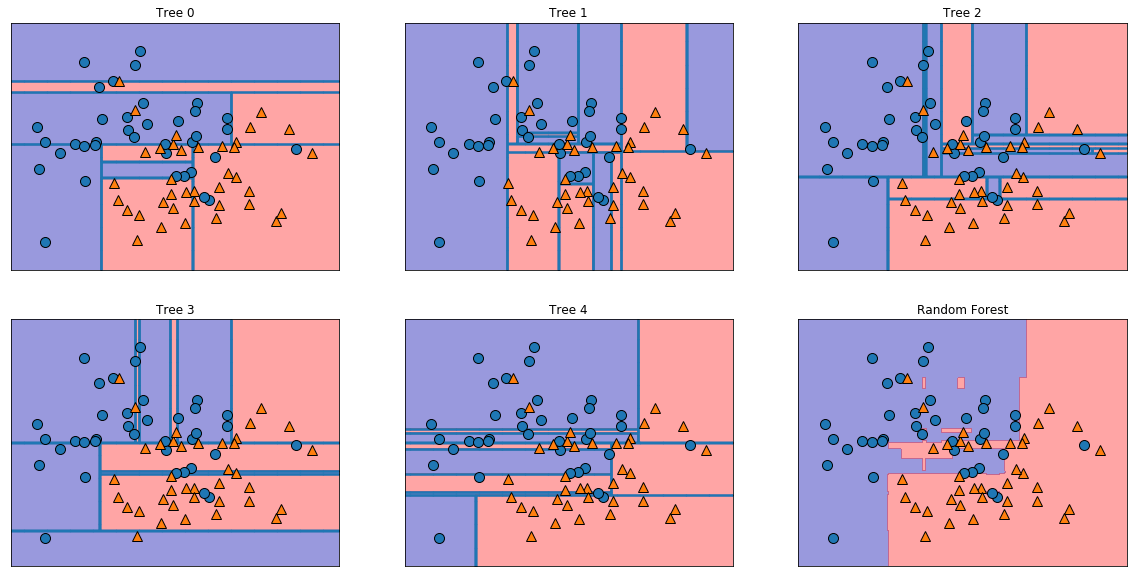

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 


In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
#癌症数据集
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

In [8]:
print("Accuracy on training set:{:.3f}".format(forest.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set:1.000
Accuracy on testing set:0.972


        """
       特征重要性可视化
       定义函数，调用函数
        “”“

In [15]:
from sklearn.tree import export_graphviz
import graphviz

In [14]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

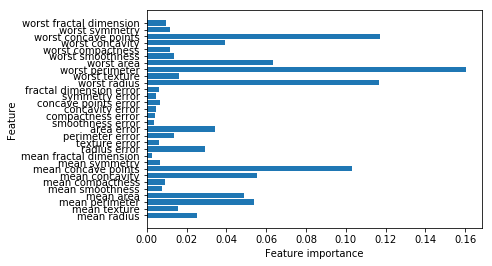

In [16]:
plot_feature_importances_cancer(forest)

“”“

随机森林分类&回归优点：
    调参数简单，无需对数据进行标准化
    随机森林解释比单枝决策树更难
    

参数调节：
    对于有多个cou内核的电脑，n_jobs 可以设置使用cores的数量来进行线性加速，n_jobs=-1表示使用电脑中所有
    n_estimators 随机森林使用决策树数量，越大越好，但也意味着对内存的要求以及计算时间延长
    减枝策略 max_depth 决策树深度
    max_features 决定每棵树的随机性，对于分类：默认设置max_feature=sqrt ，对于回归；默认log2
    max_feature 和 max_leaf_nodes 越大模型表现越好，能够降低对于模型训练和预测对时间和空间的要求
    
    
注意：    
    在随机森林中，random_state设置与否对于结果有很大影响
 
 
缺点：
    不适用于 “高纬度 或者 稀疏“ 数据集，比如文本数据（这种特点的数据集线性模型分类效果更好）
    在比较大的数据集上，随机森林可以达到高的准确度，但是对于时间和空间的消耗比较高，此时，如果题目在内存和时间方面要求较高可使用线性模型。

“”“    
   

                        “”“
    
    
                      梯度提升树（GBDT）
        
        
                        ”“”

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on testing set:0.958


In [29]:
#出现过拟合，采用预剪枝策略之一：限制最大深度
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on testing set:0.965


In [31]:
#预减枝策略之二：降低学习率
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [32]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on testing set:0.972


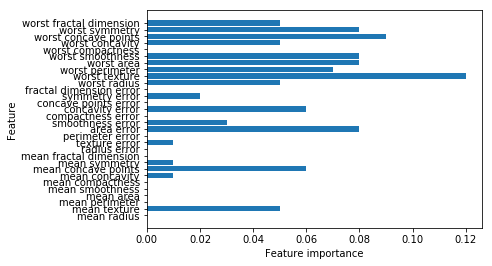

In [33]:
#特征重要性可视化
plot_feature_importances_cancer(gbrt)


"""

梯度提升树缺点：
    调参数要求较高，训练时间较长
    不适用于高维数据集，稀疏数据集
    
优点：
    无需对数据进行标准化处理，可适用于二类或者连续特征数据集
    
 主要参数：
    n_estimator 使用决策树数目（随机森林下越高越好），但是在越大模型更复杂，GBDT中回带来过拟合
    learning_rate 决定决策树对于前面预测错误数据的修正程度，优先调节n_estimator
    max_depth 为了降低单颗树的复杂度，在GBDT中，默认比较小，一般不超过5